## TSLA: MACD & Stochastic Oscillator 

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook 

In [4]:
# get the TSLA data

file = pd.read_csv("TSLA_updated.csv", index_col = 0, parse_dates= True)
df = pd.DataFrame(file)
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Daily_Change,Daily_Pct_Change,Normalized_Change
Date,,,,,,,,,
2020-05-26,166.90,166.92,163.14,163.77,163.77,40448500,-3.13,-1.87,1.00
2020-05-27,164.17,165.54,157.00,164.05,164.05,57747500,-0.13,-0.08,1.00
2020-05-28,162.70,164.95,160.34,161.16,161.16,36278000,-1.54,-0.95,0.98


In [8]:
df = df.drop(["Daily_Change", "Daily_Pct_Change"], axis=1)

In [5]:
# Calculating MACD
# need EMA (12 period) & EMA (26 period)

exp1 = df["Close"].ewm(span=12, adjust=False).mean()
exp2 = df["Close"].ewm(span=26, adjust=False).mean()

In [9]:
# Create MACD & Signal Line Columns
df["MACD"] = exp1-exp2
df["Signal_Line"] = df["MACD"].ewm(span=9, adjust=False).mean()
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Normalized_Change,MACD,Singal_Line
Date,,,,,,,,,
2021-05-17,575.55,589.73,561.20,576.83,576.83,32390400,3.52,-30.282658,-17.472119
2021-05-18,568.00,596.25,563.38,577.87,577.87,36830600,3.53,-31.932099,-20.364115
2021-05-19,552.55,566.21,546.98,563.46,563.46,39578400,3.44,-34.010014,-23.093295
2021-05-20,575.00,588.85,571.07,586.78,586.78,30821100,3.58,-33.390146,-25.152665
2021-05-21,596.11,596.68,580.00,580.88,580.88,25943600,3.55,-32.994636,-26.721059


In [14]:
# df = df.rename(columns={"Singal_Line" : "Signal_Line"})
# df.sample(n=3)

### Graph the MACD & Signal Line 

#### When the MACD is *ABOVE* the Signal line, it is a buy/hold indicator...
#### When the MACD is *BELOW* the Signal line, it is a sell indictator

#### BOTH MACD & the Signal Line are LAGGING INDICTATORS 

<IPython.core.display.Javascript object>


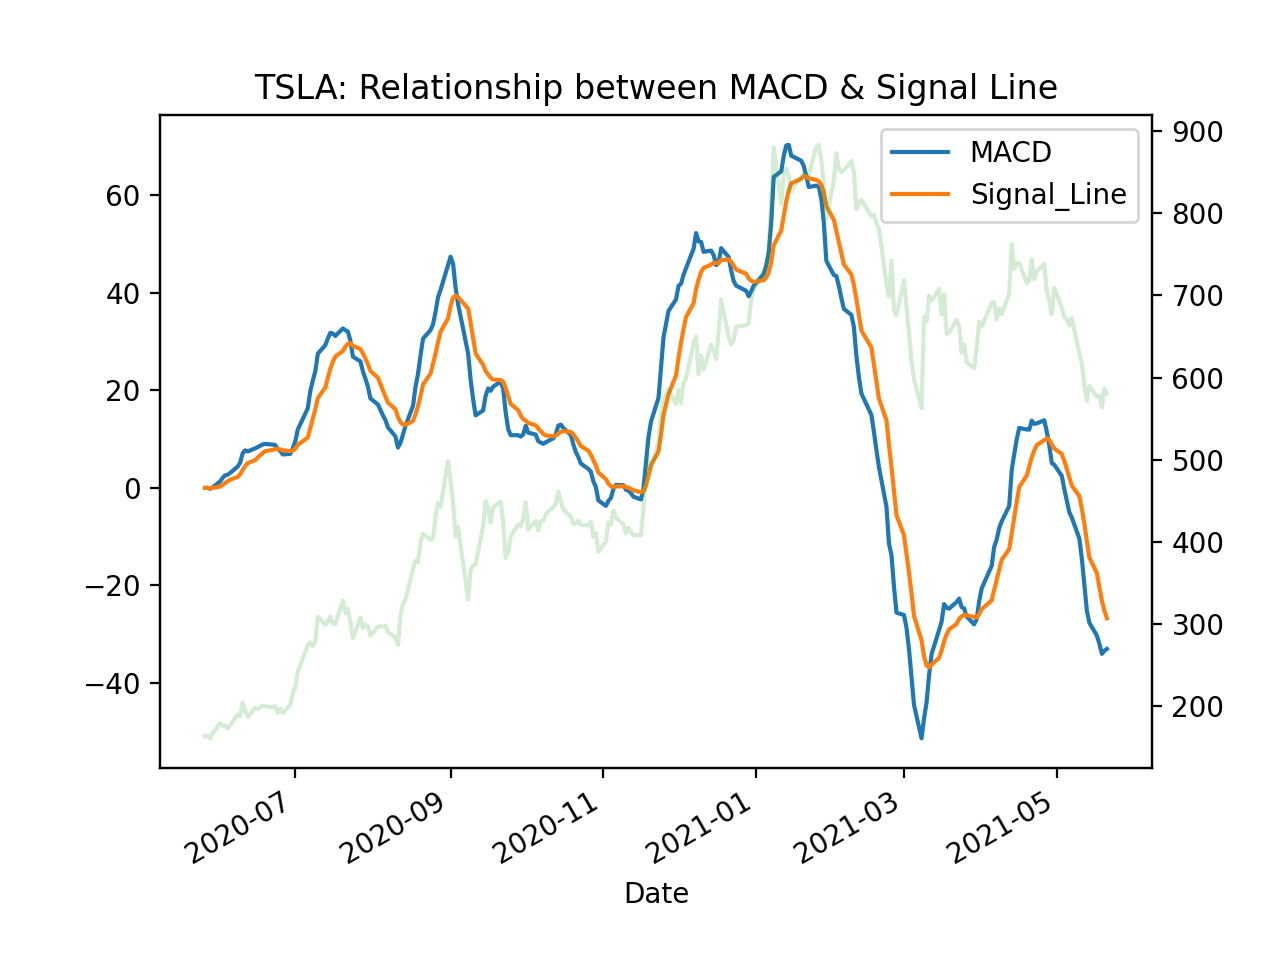

In [18]:
fig, ax = plt.subplots()
df[["MACD", "Signal_Line"]].plot(ax=ax)
df["Close"].plot(ax=ax, alpha=.20, secondary_y=True)
plt.title("TSLA: Relationship between MACD & Signal Line")
# save figure
# plt.savefig("TSLA_MACD_Signal.png")

# When the MACD is *ABOVE* the Signal line, it is a buy/hold indicator...
# When the MACD is *BELOW* the Signal line, it is a sell indictator

# BOTH MACD & Signal Line are LAGGING INDICTATORS 

### Stochastic Oscillator 
#### Lagging Indictator

##### 14-high: Max of last 14 trading days
##### 14-low: Min. of last 14 trading days
##### %K: (Last close -14 day low)*100 / (14 high - 14 low)
##### %D: Simple Moving Average of %K

In [19]:
high14 = df["High"].rolling(14).max()

low14 = df["Low"].rolling(14).min()

# %K 
df["%K"] = (df["Close"] - low14)*100/(high14-low14)
# %D
df["%D"] = df["%K"].rolling(3).mean()

In [20]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Normalized_Change,MACD,Signal_Line,%K,%D
Date,,,,,,,,,,,
2021-05-17,575.55,589.73,561.20,576.83,576.83,32390400,3.52,-30.282658,-17.472119,11.025542,11.894189
2021-05-18,568.00,596.25,563.38,577.87,577.87,36830600,3.53,-31.932099,-20.364115,11.692979,13.675670
2021-05-19,552.55,566.21,546.98,563.46,563.46,39578400,3.44,-34.010014,-23.093295,9.780996,10.833172
2021-05-20,575.00,588.85,571.07,586.78,586.78,30821100,3.58,-33.390146,-25.152665,25.028298,15.500758
2021-05-21,596.11,596.68,580.00,580.88,580.88,25943600,3.55,-32.994636,-26.721059,23.702979,19.504091


### Graphing the Stochastic Oscillator 

<IPython.core.display.Javascript object>


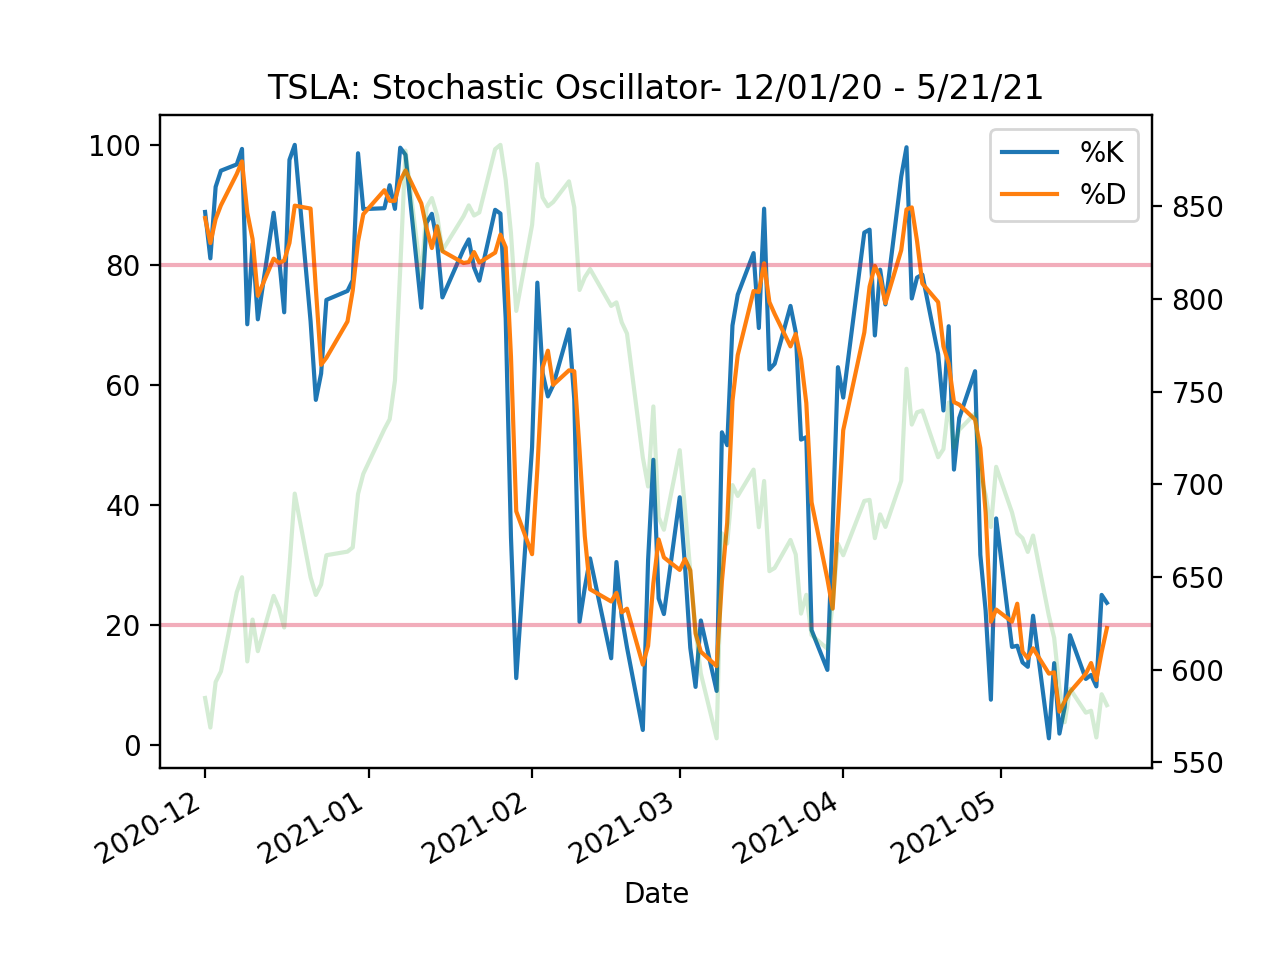

In [26]:
fig, ax = plt.subplots()
df[["%K", "%D"]].loc["2020-12-01":].plot(ax=ax)
ax.axhline(80, c="crimson", alpha=0.35)
ax.axhline(20, c="crimson", alpha=0.35)
df["Close"].loc["2020-12-01":].plot(ax=ax, alpha=.2, secondary_y=True)
plt.title("TSLA: Stochastic Oscillator- 12/01/20 - 5/21/21")

# save fig
# plt.savefig("TSLA_Stochastic.png")

In [ ]:
# Findings - 
# When the stock is above the 80% line, it is "overbought" and will likely experience a downward correction

# Looking for when the D line is *LOWER* than the K line and above the 80% line, likely time to *SELL*
# On the other hand, when the D line is *HIGHER* than the K line and *below* the 20% line, likely undervalued- BUY